# U.S. Medical Insurance Costs

In this project, a CSV file was provided that includes the medical insurance details of patients.

We will be investigated this data using Python.<br>
The goal with this project will be to analyze various attributes within insurance.csv to learn more about the patient information in the file and gain insight into potential use cases for the dataset.

In [58]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


 This data contains the following details of a individual.<br>
**age, sex, bmi, numver of children, smoker or not, region and charges of their insurance.**

## 1. Check for Null or empty strings

In [42]:
# Check for empty strings and null values
null_rows = data.isnull().any(axis=1)
empty_rows = (data == '').any(axis=1)

# Combine the results and print the final DataFrame
result = data[null_rows | empty_rows]
print(result)

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


Here we have checked that does any row contain null values or an empty strings. the data frame contain non of the above.

## 2. Data Analysis

First lets see the **discriptive statics** of numerical columns.

In [54]:
data[["age", "charges","bmi", "children"]].describe()

,age,charges,bmi,children
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,13270.422265,30.663397,1.094918
std,14.049960,12110.011237,6.098187,1.205493
min,18.000000,1121.873900,15.960000,0.000000
25%,27.000000,4740.287150,26.296250,0.000000
50%,39.000000,9382.033000,30.400000,1.000000
75%,51.000000,16639.912515,34.693750,2.000000
max,64.000000,63770.428010,53.130000,5.000000


**age**<br>
1. The average age of a patient is about 39 years.
2. The maximum aged patient is 64 years old.
3. 25% of the patients are less than 27 tears old.

**charges**<br>
1. The avarage of incurence charge is about 13270 \\$.
2. 50% of the patients are charged less than 9382 \\$.
3. The fact that the median is lower than the mean indicates that the distribution of the data is skewed to the right. This means that there are likely some high values that are pulling the mean up, while the majority of the data falls towards the lower end. **further analysis must need for this.

<AxesSubplot:>

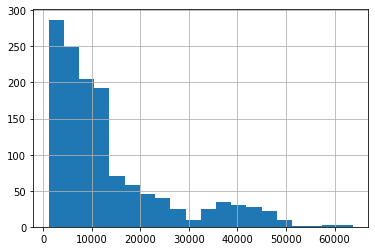

In [62]:
data["charges"].hist(bins=20)

Here We can see that majority of the patients have insurence that is less than 10,000 \\$

### 2.1 Remove outliers

Here we remove data from the patents that has insurence charges over 95%th precentile of tha charges

41181.827787499926


<AxesSubplot:>

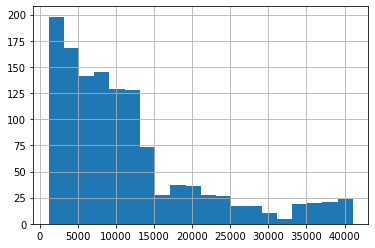

In [76]:
# Compute the 0.95th percentile of 'col1'
charges_95th_percentile = data['charges'].quantile(0.95)
print(charges_95th_percentile)

# Select rows where the value in 'col1' is above the 0.95th percentile
selected_rows = data.loc[data['charges'] < charges_95th_percentile]

# Create a new DataFrame using the selected rows
new_df = pd.DataFrame(selected_rows)

new_df["charges"].hist(bins=20)

In [78]:
new_df["charges"].describe()

count     1271.000000
mean     11514.249218
std       9571.887536
min       1121.873900
25%       4540.246900
50%       8825.086000
75%      14126.328875
max      41097.161750
Name: charges, dtype: float64

Still the data is skewed to the right. But removing more data to normalize the distribution may case wrong predictions. So we are going to do further analysis using these data.

### 2.2 How insurence charge differes with sex

In [79]:
new_df[["sex", "charges"]].groupby("sex").mean()

,charges
sex,
female,11157.581088
male,11871.479031


It seems that insurence charges not much differes according to the sex of a person.

### 2.3 How insurence charge differes with Smoking

In [80]:
new_df[["smoker", "charges"]].groupby("smoker").mean()

,charges
smoker,
no,8434.268298
yes,27345.648733


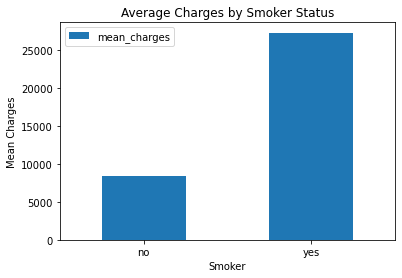

In [87]:
# Group by 'smoker' and calculate mean of 'charges'
mean_charges_by_smoker = new_df.groupby('smoker')['charges'].mean()

# Create new DataFrame with means for each group
mean_charges_df = pd.DataFrame({'smoker': mean_charges_by_smoker.index, 'mean_charges': mean_charges_by_smoker.values})

# Create bar chart
mean_charges_df.plot(kind='bar', x='smoker', y='mean_charges', rot=0)

# Add axis labels and title
plt.xlabel('Smoker')
plt.ylabel('Mean Charges')
plt.title('Average Charges by Smoker Status')

# Show plot
plt.show()

As you can see, ***smokers are charged more than 3 times higher than the non-smokers***

### 2.4 How insurence charge differes with region

In [82]:
new_df[["region", "charges"]].groupby("region").mean()

,charges
region,
northeast,12148.029645
northwest,11088.366091
southeast,11792.616064
southwest,11012.222911


It seems that insurence charges not much differes according to the region of a person

### 2.5 How insurence charge differes with age

In [98]:
# use cut() function to create bins for age column
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]
labels = ['15', '20', '25', '30', '35', '40', '45', '50', '55', '60']
new_df['age_group'] = pd.cut(new_df['age'], bins=bins, labels=labels)

# group the data by age_group and calculate the mean charge
grouped_df = new_df.groupby('age_group')['charges'].mean()

print(grouped_df)

age_group
15     8713.482413
20     9040.399439
25     9530.193080
30     9946.197401
35    11602.167815
40    12296.310331
45    12914.155422
50    13595.608668
55    13966.871889
60    17049.717099
Name: charges, dtype: float64


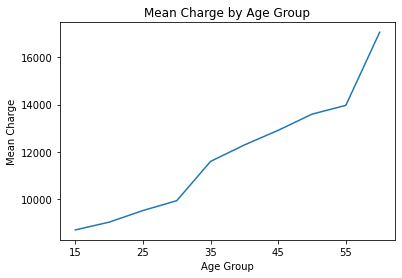

In [99]:
grouped_df.plot(kind='line')

# add labels and title to the plot
plt.xlabel('Age Group')
plt.ylabel('Mean Charge')
plt.title('Mean Charge by Age Group')

plt.show()

It seems that the mean insurence chaarge is heavily increased with the age.